In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('2A.tsv', sep = '\t')

In [3]:
df.head()

,Customer ID,Birth Date,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,1969/03/05,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,2005/07/01,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,1974/12/01,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,2003/11/21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,1979/09/13,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.shape

(3900, 19)

In [5]:
df.columns

Index(['Customer ID', 'Birth Date', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Birth Date                3900 non-null   object 
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

There is no missing value in this dataset.

In [7]:
df.describe()

,Customer ID,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,59.764359,3.749949,25.351538
std,1125.977353,23.685392,0.716223,14.447125
min,1.000000,20.000000,2.500000,1.000000
25%,975.750000,39.000000,3.100000,13.000000
50%,1950.500000,60.000000,3.700000,25.000000
75%,2925.250000,81.000000,4.400000,38.000000
max,3900.000000,100.000000,5.000000,50.000000


In [8]:
df.describe(include='object')

,Birth Date,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,3534,4,25,4,50,4,25,4,2,6,6,2,2,6,7
top,1972/05/03,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,3,2642,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [9]:
df = df.drop(columns=[
    "Customer ID",
    "Item Purchased",
    "Size",
    "Color",
    "Payment Method",
    "Shipping Type",
    "Preferred Payment Method"
])

These columns were dropped because they don’t contribute meaningful insights to the analysis. Customer ID is just an identifier, while Item Purchased, Size, and Color are too product-specific for the broader trends we want to capture. Similarly, Payment Method, Preferred Payment Method, and Shipping Type relate more to transaction logistics than purchasing behavior. Removing them keeps the dataset focused, avoids noise, and makes the analysis more straightforward.

In [10]:
df['Discount Applied'].value_counts()

,count
Discount Applied,
No,2223
Yes,1677


In [11]:
df['Gender'].value_counts()

,count
Gender,
Male,2642
Female,1231
f,17
M,10


In [12]:
df['Gender'] = df['Gender'].replace('f', 'Female')
df['Gender'] = df['Gender'].replace('M', 'Male')

The Gender column contained inconsistent values ( f, M ). To standardize the data, these were replaced with Female and Male.

In [13]:
df['Location'].value_counts()

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87


In [14]:
df['Category'].value_counts()

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


In [15]:
df['Discount Applied'].value_counts()

,count
Discount Applied,
No,2223
Yes,1677


In [16]:
df['Promo Code Used'].value_counts()

,count
Promo Code Used,
No,2223
Yes,1677


In [17]:
df['Frequency of Purchases'].value_counts()

,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


In [18]:
df['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


In [19]:
from datetime import datetime

# Convert Birth Date to Age
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')
df['Age'] = datetime.now().year - df['Birth Date'].dt.year

# Drop Birth Date (sudah tidak perlu)
df = df.drop(columns=['Birth Date'])


The Birth Date column is first converted into a proper datetime format. From this, age is calculated by subtracting the birth year from the current year. Since the analysis only requires age, the original Birth Date column is then dropped to keep the dataset clean and concise.

In [20]:

state_to_region = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',

    # Midwest
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Missouri': 'Midwest',
    'Nebraska': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest',

    # South
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South',
    'Maryland': 'South', 'North Carolina': 'South', 'South Carolina': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'Alabama': 'South',
    'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South',
    'Arkansas': 'South', 'Louisiana': 'South', 'Oklahoma': 'South',
    'Texas': 'South',

    # West
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West',
    'Montana': 'West', 'Nevada': 'West', 'New Mexico': 'West',
    'Utah': 'West', 'Wyoming': 'West', 'Alaska': 'West',
    'California': 'West', 'Hawaii': 'West', 'Oregon': 'West',
    'Washington': 'West'
}

df['Region'] = df['Location'].map(state_to_region)
print(f"Region distribution:")
print(df['Region'].value_counts())

# Drop Location
df = df.drop(columns=['Location'])

Region distribution:
Region
South        1271
West         1018
Midwest       937
Northeast     674
Name: count, dtype: int64


The Location column, which contains US state names, was mapped to broader regions using the state_to_region dictionary.
This created a new Region column, grouping states into Northeast, Midwest, South, and West, allowing for easier regional analysis. After mapping, the original Location column was dropped, since only regional information is needed for analysis.

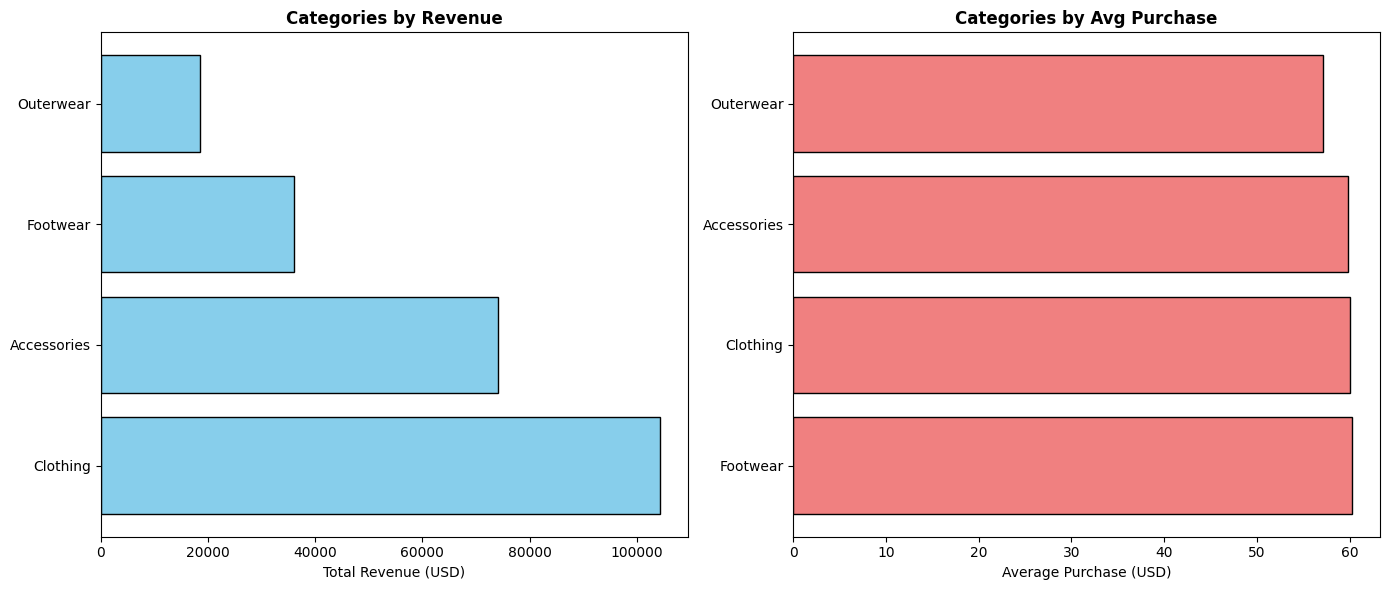

In [21]:
import matplotlib.pyplot as plt

# summary category
category_stats = df.groupby('Category')['Purchase Amount (USD)'].agg(['sum', 'mean', 'count'])
category_stats = category_stats.sort_values('sum', ascending=False)

top_categories = category_stats['sum']

category_avg = category_stats['mean'].sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# revenue
axes[0].barh(top_categories.index, top_categories.values, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Total Revenue (USD)')
axes[0].set_title('Categories by Revenue', fontweight='bold')

# avg purchase
axes[1].barh(category_avg.index, category_avg.values, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('Average Purchase (USD)')
axes[1].set_title('Categories by Avg Purchase', fontweight='bold')

plt.tight_layout()
plt.show()



Revenue chart (left): Clothing generates the highest total revenue, followed by Accessories, Footwear, and Outerwear. This indicates that Clothing is the top-performing category in terms of overall sales volume.

Average Purchase chart (right): Outerwear, Accessories, Clothing, and Footwear have the highest average purchase per transaction. This means that while Clothing sells the most overall, Outerwear and Accessories tend to have higher spending per purchase.

                       mean  median  count
Discount Applied                          
No                60.130454    60.0   2223
Yes               59.279070    60.0   1677
                      mean  median  count
Promo Code Used                          
No               60.130454    60.0   2223
Yes              59.279070    60.0   1677


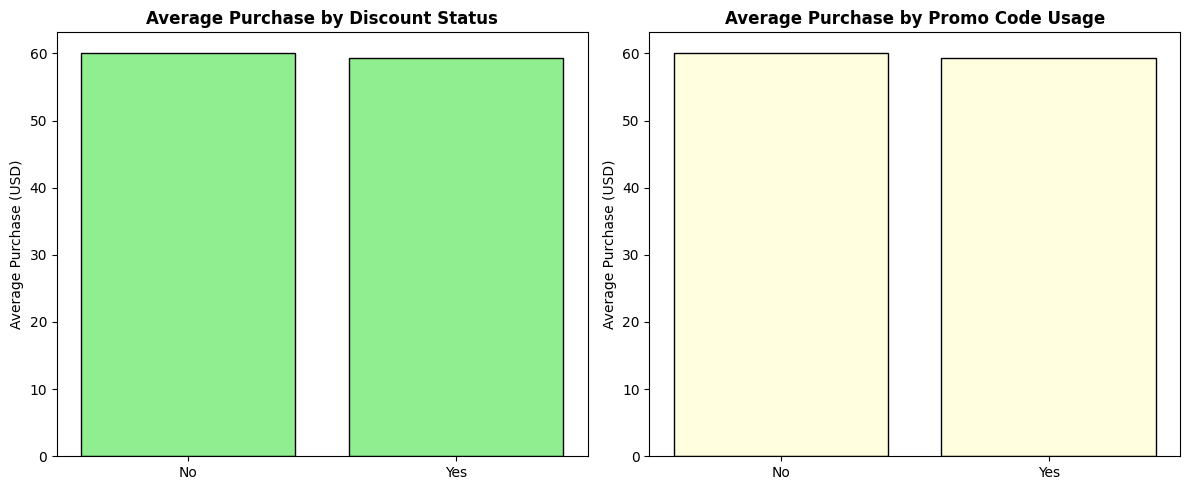

In [22]:
import matplotlib.pyplot as plt

discount_stats = df.groupby('Discount Applied')['Purchase Amount (USD)'].agg(['mean', 'median', 'count'])
print(discount_stats)

promo_stats = df.groupby('Promo Code Used')['Purchase Amount (USD)'].agg(['mean', 'median', 'count'])
print(promo_stats)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Discount Impact
discount_avg = df.groupby('Discount Applied')['Purchase Amount (USD)'].mean()
axes[0].bar(discount_avg.index, discount_avg.values, color='lightgreen', edgecolor='black')
axes[0].set_ylabel('Average Purchase (USD)')
axes[0].set_title('Average Purchase by Discount Status', fontweight='bold')

# Promo Code Impact
promo_avg = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
axes[1].bar(promo_avg.index, promo_avg.values, color='lightyellow', edgecolor='black')
axes[1].set_ylabel('Average Purchase (USD)')
axes[1].set_title('Average Purchase by Promo Code Usage', fontweight='bold')

plt.tight_layout()
plt.show()


- There is almost no difference in the average purchase amount between customers who used a discount and those who didn’t. This suggests that offering discounts does not significantly affect how much customers spend on average.
- Similar to discounts, using a promo code does not significantly change the average purchase value. This indicates that promo code usage might not strongly influence spending behavior for this dataset.

This bar chart shows the average purchase amount in USD for different age groups. The values are fairly consistent across all groups, around $60, indicating similar spending behavior regardless of age.

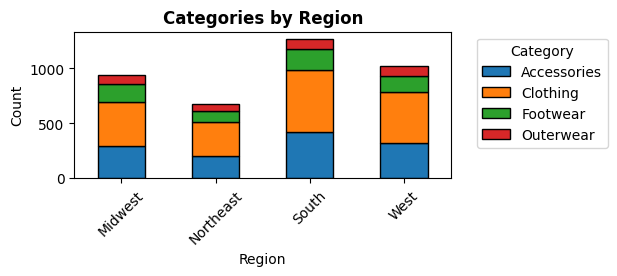

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(5, 3, 14)

# pakai semua kategori, bukan top 5
region_category = df.groupby(['Region', 'Category']).size().unstack(fill_value=0)

region_category.plot(
    kind='bar',
    stacked=True,
    ax=plt.gca(),
    edgecolor='black'
)

plt.ylabel('Count')
plt.title('Categories by Region', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

The bar chart titled “Categories by Region” compares product categories across four regions: Midwest, Northeast, South, and West. Each bar shows the total count for a region, divided into four categories --> Accessories (blue), Clothing (orange), Footwear (green), and Outerwear (red).

The South region has the highest total count, followed by the West, Midwest, and Northeast. Across all regions, Clothing makes up the largest portion, while Accessories come next, and Footwear and Outerwear contribute smaller shares.

Overall, the chart clearly shows that the South leads in total volume, and Clothing is the most dominant category in every region.

Gender          Female       Male
Category                         
Accessories  60.762755  59.411557
Clothing     60.496403  59.803556
Footwear     59.472362  60.645000
Outerwear    58.425743  56.605381


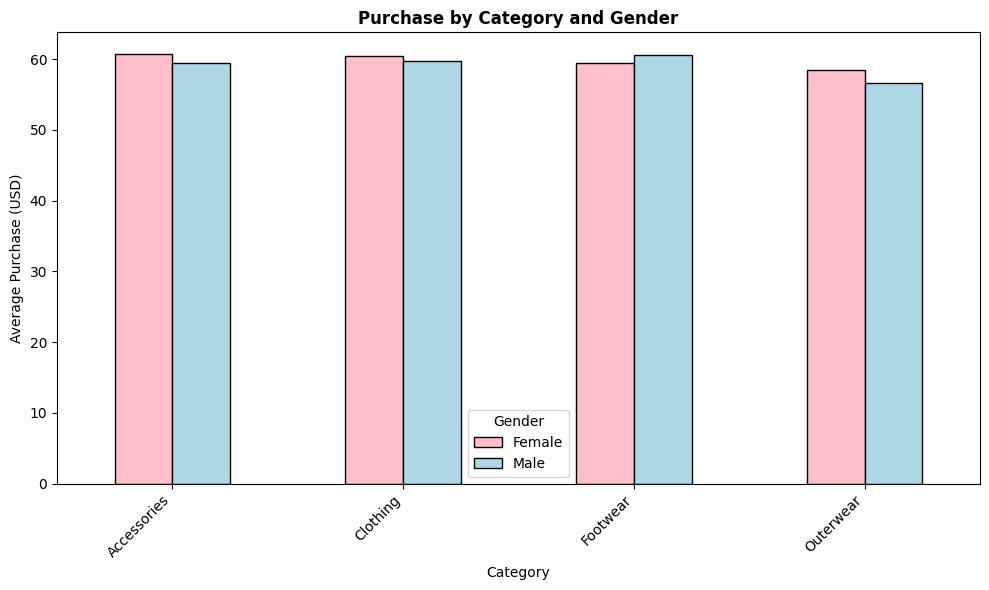

In [24]:
import matplotlib.pyplot as plt

category_gender = df.groupby(['Category', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
print(category_gender.head())

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

category_gender.plot(kind='bar', ax=ax, color=['pink', 'lightblue'], edgecolor='black')

ax.set_ylabel('Average Purchase (USD)')
ax.set_title('Purchase by Category and Gender', fontweight='bold')
ax.set_xticklabels(category_gender.index, rotation=45, ha='right')
ax.legend(title='Gender')

plt.tight_layout()
plt.show()


This bar chart compares the average purchase value (USD) between female and male customers across four categories:

- Accessories & Clothing: Females spend slightly more than males.
- Footwear: Males spend slightly more than females.
- Outerwear: Females spend more than males.

Spending patterns are fairly balanced between genders, but females generally spend a bit more across most categories, except for footwear.

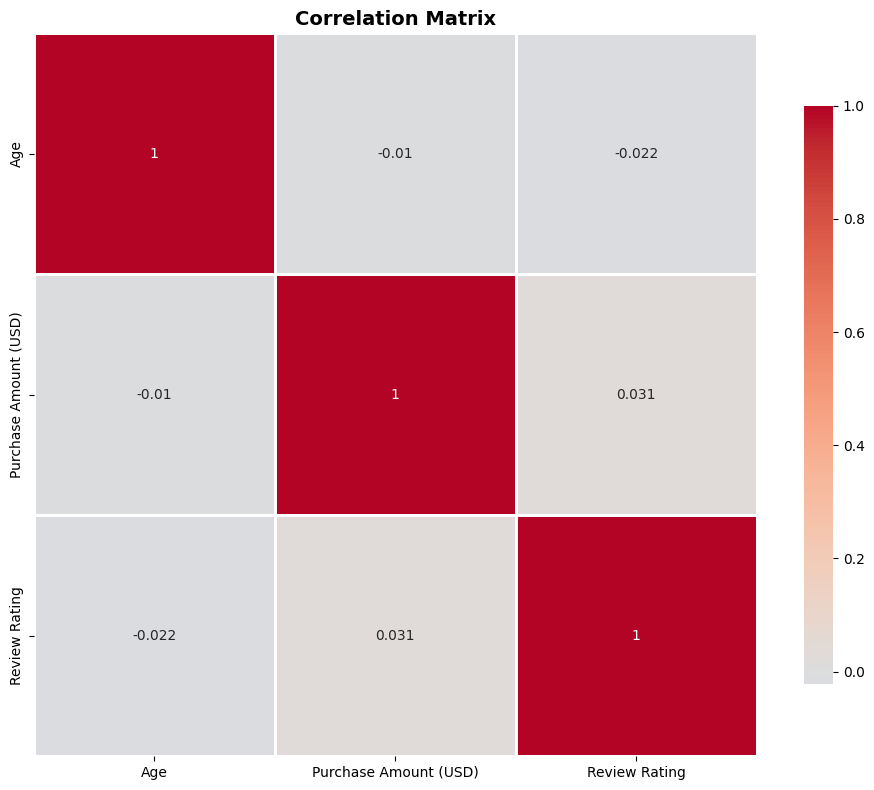

In [25]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating']
correlation = df[numerical_cols].corr()


# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()



The correlation matrix shows that all correlation values are very close to zero, which means there is almost no linear relationship between the variables **Age**, **Purchase Amount (USD)**, and **Review Rating**. This suggests that a customer’s age does not have a significant impact on how much they spend or on the rating they give. Likewise, spending more money does not necessarily result in higher or lower review ratings. Overall, the data indicates that these variables are not strongly related, implying that factors such as age and purchase amount are unlikely to explain differences in customer review ratings.


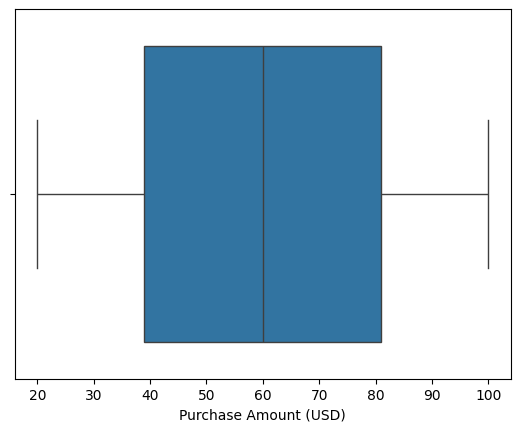

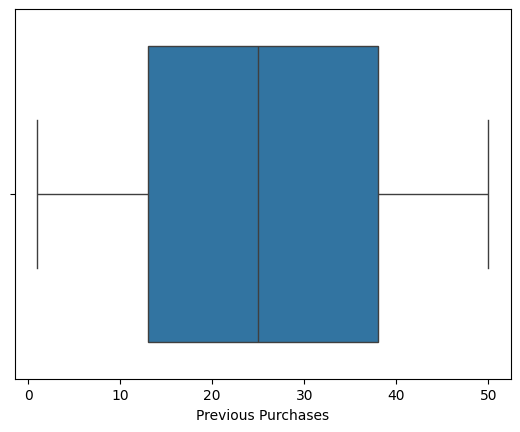

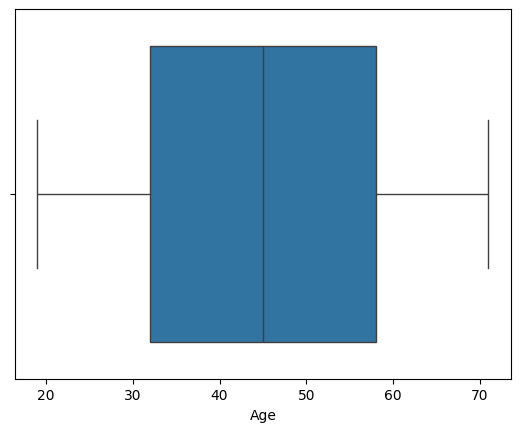

In [26]:
for column in ['Purchase Amount (USD)', 'Previous Purchases', 'Age']:
  sns.boxplot(x=df[column])
  plt.show()

All three boxplots show that there are no outliers in the data. This means all values fall within a reasonable range, and there are no extreme or unusual data points. The distributions appear balanced across all variables.


In [27]:
df.columns

Index(['Gender', 'Category', 'Purchase Amount (USD)', 'Season',
       'Review Rating', 'Subscription Status', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases',
       'Age', 'Region'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

df_enc = df.copy()

col_enc = ['Gender', 'Subscription Status', 'Promo Code Used', 'Discount Applied']
for col in col_enc:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col])




In [29]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

frequency_mapping = {
    'Annually': 1,
    'Every 3 Months': 2,
    'Quarterly': 3,
    'Monthly': 4,
    'Fortnightly': 5,
    'Bi-Weekly': 6,
    'Weekly': 7
}
df_enc['Frequency of Purchases'] = df_enc['Frequency of Purchases'].map(frequency_mapping)


In [30]:
# One-hot encoding
nominal_cols = ['Category', 'Season', 'Region']
df_enc = pd.get_dummies(df_enc, columns=nominal_cols, drop_first=True)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_enc)


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

distortions = []
silhouette_scores = []
davies_bouldin_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)

    distortions.append(kmeans.inertia_)
    sil_score = silhouette_score(df_scaled, labels)
    db_score = davies_bouldin_score(df_scaled, labels)

    silhouette_scores.append(sil_score)
    davies_bouldin_scores.append(db_score)

    print(f"k={k:2d} | Silhouette: {sil_score:.4f} | Davies-Bouldin: {db_score:.4f} | Inertia: {kmeans.inertia_:.2f}")



k= 2 | Silhouette: 0.1560 | Davies-Bouldin: 2.2627 | Inertia: 59094.09
k= 3 | Silhouette: 0.1616 | Davies-Bouldin: 2.0875 | Inertia: 55772.20
k= 4 | Silhouette: 0.1115 | Davies-Bouldin: 2.4795 | Inertia: 53713.90
k= 5 | Silhouette: 0.0912 | Davies-Bouldin: 2.9381 | Inertia: 51444.89
k= 6 | Silhouette: 0.1037 | Davies-Bouldin: 2.3455 | Inertia: 49509.16
k= 7 | Silhouette: 0.1147 | Davies-Bouldin: 2.5838 | Inertia: 47945.82
k= 8 | Silhouette: 0.1017 | Davies-Bouldin: 2.3126 | Inertia: 46340.26
k= 9 | Silhouette: 0.1051 | Davies-Bouldin: 2.4751 | Inertia: 44741.57
k=10 | Silhouette: 0.1097 | Davies-Bouldin: 2.3572 | Inertia: 43444.30


- The highest Silhouette Score is at k = 3 (0.1616), showing the best cluster separation
- The lowest Davies-Bouldin Index is also at k = 3 (2.0875), meaning the clusters are the most compact and distinct
- Inertia decreases steadily, but the improvement slows down after k = 3, suggesting diminishing returns beyond that point

Overall, k = 3 is the most suitable choice, as it provides the best balance among all metrics.

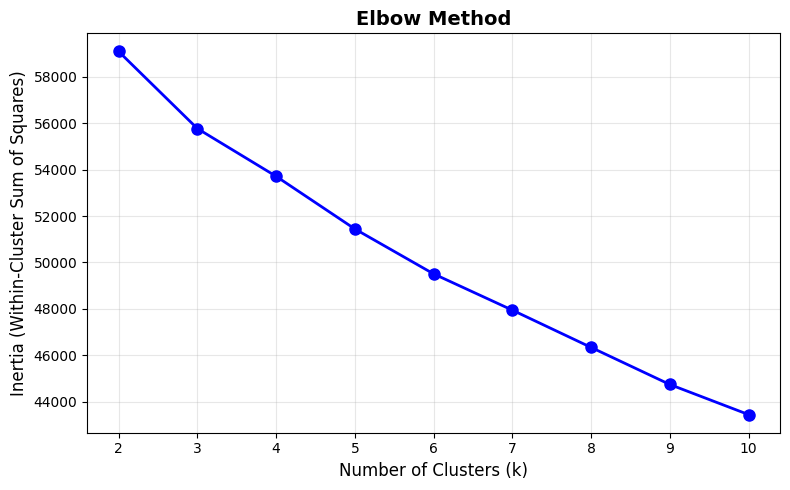

In [33]:
plt.figure(figsize=(8, 5))

# Elbow Method
plt.plot(K, distortions, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()


The Elbow Method graph shows how inertia decreases as the number of clusters (k) increases. In this case, the curve gradually declines from k = 2 to k = 10 without a clear or sharp “elbow” point, meaning the optimal cluster number isn’t visually distinct.

However, by comparing this with the results from the Silhouette Score and Davies-Bouldin Index, which both indicate the best performance at k = 3, we can conclude that k = 3 is still the most appropriate choice.

In [34]:
optimal_k = 3  # ubah sesuai hasil evaluasi
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(df_scaled)

print(df['Cluster'].value_counts().sort_index())



Cluster
0     324
1    1533
2    2043
Name: count, dtype: int64


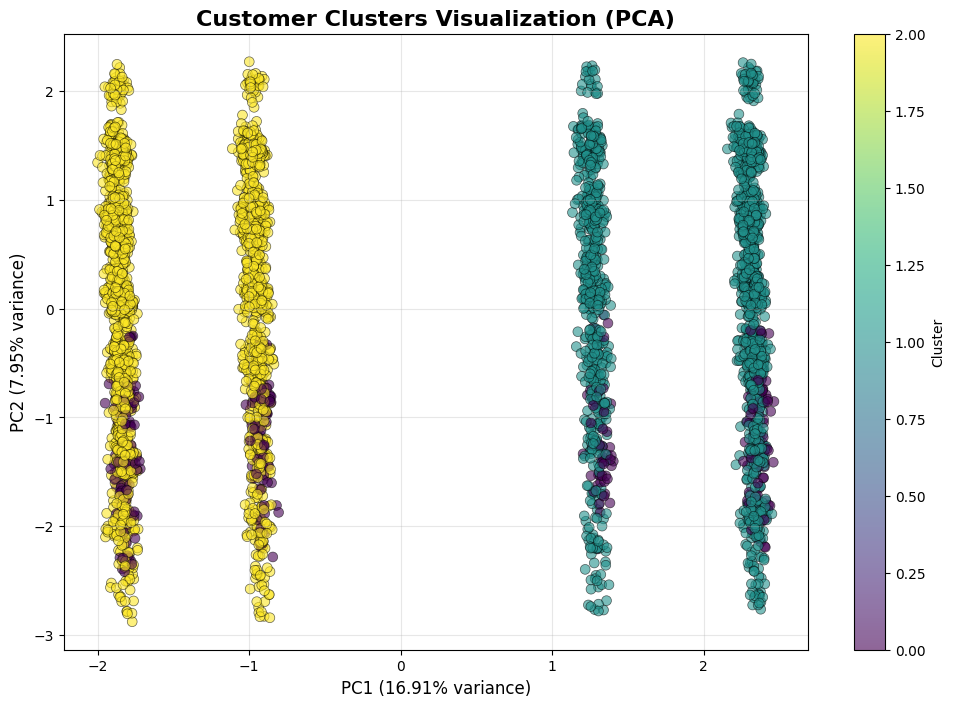

PCA explains 24.86% of total variance


In [35]:
# PCA for dimension reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1],
                     c=df['Cluster'], cmap='viridis',
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Customer Clusters Visualization (PCA)', fontsize=16, fontweight='bold')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.savefig('cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"PCA explains {pca.explained_variance_ratio_.sum():.2%} of total variance")

This scatter plot shows the clustering results after applying PCA to reduce the data dimensions into two main components: PC1 and PC2.
- Each point represents one customer, and the colors indicate which cluster they belong to.
- PC1 (16.91%) and PC2 (7.95%) together explain about 24.86% of the total data variation.
- The distribution of points suggests that the clusters are somewhat separated, although a few overlaps still exist.

In [36]:
numeric_profile = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Purchase Amount (USD)': ['mean', 'median', 'std'],
    'Review Rating': ['mean', 'std'],
    'Previous Purchases': ['mean', 'median']
}).round(2)

print("\nNumeric Features Profile:")
print(numeric_profile)



Numeric Features Profile:
           Age        Purchase Amount (USD)               Review Rating        \
          mean    std                  mean median    std          mean   std   
Cluster                                                                         
0        45.31  15.38                 57.17   54.5  24.59          3.75  0.70   
1        45.05  15.35                 59.65   60.0  23.51          3.74  0.72   
2        45.04  15.08                 60.26   60.0  23.65          3.76  0.72   

        Previous Purchases         
                      mean median  
Cluster                            
0                    24.96   25.0  
1                    25.68   25.0  
2                    25.17   25.0  


1) Age: All clusters have an average age around 45 years, with similar variation. This means age doesn’t play a big role in separating the groups

2) Purchase Amount (USD): Cluster 2 has the highest average spending, suggesting that it represents higher-spending customers

3) Review Rating: All clusters have similar average ratings (around 3.7–3.8), showing consistent satisfaction across groups

4) Previous Purchases: Cluster 1 shows a slightly higher average (25.68) than the others, suggesting they’re more loyal or frequent buyers

Based on the numeric feature profiles, we can identify the characteristics of each cluster as follows:

- Cluster 2 represents high spenders, as they have the highest average purchase amount.

- Cluster 1 consists of repeat or loyal buyers, shown by their slightly higher number of previous purchases.

- Cluster 0 includes average customers, with moderate spending and purchase frequency.

In [37]:
categorical_profile = df.groupby('Cluster').agg({
    'Gender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Subscription Status': lambda x: f"{(x == 'Yes').sum()} ({(x == 'Yes').mean()*100:.1f}%)",
    'Promo Code Used': lambda x: f"{(x == 'Yes').sum()} ({(x == 'Yes').mean()*100:.1f}%)",
    'Discount Applied': lambda x: f"{(x == 'Yes').sum()} ({(x == 'Yes').mean()*100:.1f}%)",
    'Category': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown',
    'Season': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
})

print(categorical_profile)


         Gender Subscription Status Promo Code Used Discount Applied  \
Cluster                                                                
0          Male          91 (28.1%)     144 (44.4%)      144 (44.4%)   
1          Male         962 (62.8%)   1533 (100.0%)    1533 (100.0%)   
2        Female            0 (0.0%)        0 (0.0%)         0 (0.0%)   

          Category  Season  
Cluster                     
0        Outerwear    Fall  
1         Clothing  Spring  
2         Clothing    Fall  


- Cluster 0 – Deal Hunters
Mostly male customers who often use promo codes (44.4%) and discounts (44.4%). They usually buy outerwear in the fall and spend a moderate amount, not as much as Cluster 2. Their frequent use of promotions shows they are price-conscious and tend to shop when there are deals. Their buying patterns and product choices suggest they are motivated more by savings than brand loyalty.

- Cluster 1 – Loyal Subscribers
Mostly male with the highest subscription rate (62.8%). All of them use promo codes and discounts (100%) and have slightly more previous purchases on average. Their high subscription rate and consistent engagement with discounts indicate a long-term relationship with the brand. They make repeat purchases, showing habitual loyalty rather than just opportunistic shopping.

- Cluster 2 - Independent Shoppers
Entirely female customers who don’t use promo codes, discounts, or subscriptions. They focus on clothing, usually shop in fall, and have the highest average purchase amount among the clusters. Since they spend the most without relying on promotions, they are clearly independent, high-value buyers who are less sensitive to price.




In [38]:
cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} customers ({size/len(df)*100:.1f}%)")



Cluster Sizes:
Cluster 0: 324 customers (8.3%)
Cluster 1: 1533 customers (39.3%)
Cluster 2: 2043 customers (52.4%)


Most customers belong to Clusters 1 and 2, showing that loyal and high-value buyers drive the majority of revenue, while Cluster 0 is a small, price-sensitive segment focused on discounts. This highlights that marketing should balance targeted promotions for deal hunters with loyalty programs and premium offerings for the larger, more valuable customer groups.

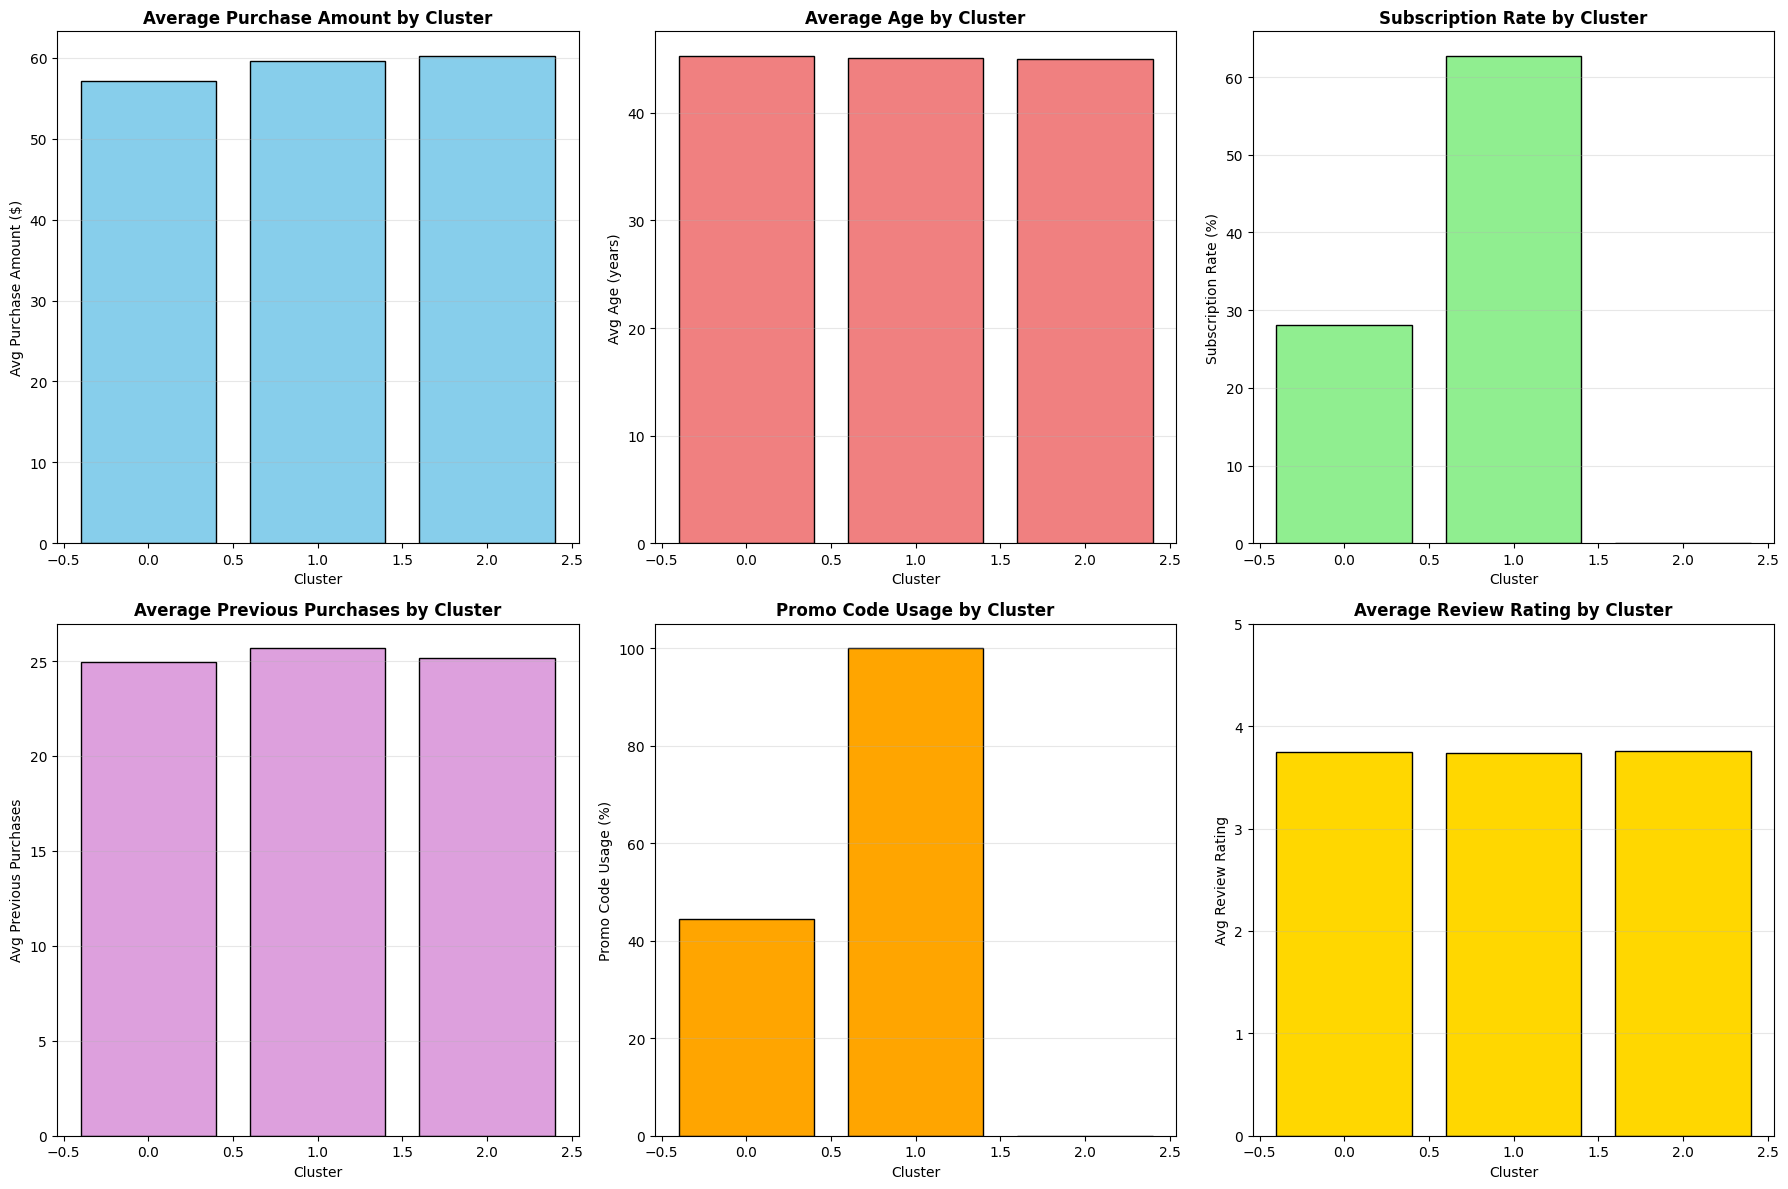

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Average Purchase Amount
cluster_avg_purchase = df.groupby('Cluster')['Purchase Amount (USD)'].mean()
axes[0, 0].bar(cluster_avg_purchase.index, cluster_avg_purchase.values, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Avg Purchase Amount ($)')
axes[0, 0].set_title('Average Purchase Amount by Cluster', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Average Age
cluster_avg_age = df.groupby('Cluster')['Age'].mean()
axes[0, 1].bar(cluster_avg_age.index, cluster_avg_age.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Avg Age (years)')
axes[0, 1].set_title('Average Age by Cluster', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Subscription Rate
cluster_sub_rate = df.groupby('Cluster')['Subscription Status'].apply(lambda x: (x == 'Yes').mean() * 100)
axes[0, 2].bar(cluster_sub_rate.index, cluster_sub_rate.values, color='lightgreen', edgecolor='black')
axes[0, 2].set_xlabel('Cluster')
axes[0, 2].set_ylabel('Subscription Rate (%)')
axes[0, 2].set_title('Subscription Rate by Cluster', fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3)

# Average Previous Purchases
cluster_prev_purchases = df.groupby('Cluster')['Previous Purchases'].mean()
axes[1, 0].bar(cluster_prev_purchases.index, cluster_prev_purchases.values, color='plum', edgecolor='black')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Avg Previous Purchases')
axes[1, 0].set_title('Average Previous Purchases by Cluster', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Promo Code Usage Rate
cluster_promo_rate = df.groupby('Cluster')['Promo Code Used'].apply(lambda x: (x == 'Yes').mean() * 100)
axes[1, 1].bar(cluster_promo_rate.index, cluster_promo_rate.values, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Promo Code Usage (%)')
axes[1, 1].set_title('Promo Code Usage by Cluster', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

# Average Review Rating
cluster_review = df.groupby('Cluster')['Review Rating'].mean()
axes[1, 2].bar(cluster_review.index, cluster_review.values, color='gold', edgecolor='black')
axes[1, 2].set_xlabel('Cluster')
axes[1, 2].set_ylabel('Avg Review Rating')
axes[1, 2].set_title('Average Review Rating by Cluster', fontweight='bold')
axes[1, 2].set_ylim([0, 5])
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('cluster_characteristics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [40]:
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster} ({len(cluster_data)} customers, {len(cluster_data)/len(df)*100:.1f}%)")
    print(f"{'='*60}")

    print(f"\n Demographics:")
    print(f"  • Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  • Gender: {cluster_data['Gender'].value_counts().to_dict()}")

    print(f"\n Purchase Behavior:")
    print(f"  • Avg Purchase Amount: ${cluster_data['Purchase Amount (USD)'].mean():.2f}")
    print(f"  • Median Purchase Amount: ${cluster_data['Purchase Amount (USD)'].median():.2f}")
    print(f"  • Avg Previous Purchases: {cluster_data['Previous Purchases'].mean():.1f}")
    print(f"  • Purchase Frequency: {cluster_data['Frequency of Purchases'].mode()[0] if len(cluster_data['Frequency of Purchases'].mode()) > 0 else 'N/A'}")

    print(f"\n Engagement:")
    print(f"  • Avg Review Rating: {cluster_data['Review Rating'].mean():.2f}")
    print(f"  • Subscription Rate: {(cluster_data['Subscription Status'] == 'Yes').mean()*100:.1f}%")
    print(f"  • Promo Code Usage: {(cluster_data['Promo Code Used'] == 'Yes').mean()*100:.1f}%")
    print(f"  • Discount Applied: {(cluster_data['Discount Applied'] == 'Yes').mean()*100:.1f}%")

    print(f"\n Preferences:")
    print(f"  • Top Category: {cluster_data['Category'].mode()[0] if len(cluster_data['Category'].mode()) > 0 else 'N/A'}")
    print(f"  • Top Season: {cluster_data['Season'].mode()[0] if len(cluster_data['Season'].mode()) > 0 else 'N/A'}")



CLUSTER 0 (324 customers, 8.3%)

 Demographics:
  • Average Age: 45.3 years
  • Gender: {'Male': 223, 'Female': 101}

 Purchase Behavior:
  • Avg Purchase Amount: $57.17
  • Median Purchase Amount: $54.50
  • Avg Previous Purchases: 25.0
  • Purchase Frequency: Fortnightly

 Engagement:
  • Avg Review Rating: 3.75
  • Subscription Rate: 28.1%
  • Promo Code Usage: 44.4%
  • Discount Applied: 44.4%

 Preferences:
  • Top Category: Outerwear
  • Top Season: Fall

CLUSTER 1 (1533 customers, 39.3%)

 Demographics:
  • Average Age: 45.1 years
  • Gender: {'Male': 1533}

 Purchase Behavior:
  • Avg Purchase Amount: $59.65
  • Median Purchase Amount: $60.00
  • Avg Previous Purchases: 25.7
  • Purchase Frequency: Every 3 Months

 Engagement:
  • Avg Review Rating: 3.74
  • Subscription Rate: 62.8%
  • Promo Code Usage: 100.0%
  • Discount Applied: 100.0%

 Preferences:
  • Top Category: Clothing
  • Top Season: Spring

CLUSTER 2 (2043 customers, 52.4%)

 Demographics:
  • Average Age: 45.0 y

In [48]:
def generate_recommendations(cluster_num, cluster_df):
    avg_purchase = cluster_df['Purchase Amount (USD)'].mean()
    avg_prev_purchases = cluster_df['Previous Purchases'].mean()
    subscription_rate = (cluster_df['Subscription Status'] == 'Yes').mean()
    promo_usage = (cluster_df['Promo Code Used'] == 'Yes').mean()
    avg_rating = cluster_df['Review Rating'].mean()

    recommendations = []

    # High-value customers
    if avg_purchase > df['Purchase Amount (USD)'].quantile(0.75):
        recommendations.append(" VIP Loyalty Program with exclusive perks")
        recommendations.append(" Early access to new collections")
        recommendations.append(" Premium gift with purchase")

    # Frequent buyers
    if avg_prev_purchases > df['Previous Purchases'].quantile(0.75):
        recommendations.append(" Reward points program")
        recommendations.append(" Free expedited shipping")

    # Price-sensitive
    if promo_usage > 0.6:
        recommendations.append(" Targeted discount campaigns (15-25% off)")
        recommendations.append(" Flash sales notifications")
        recommendations.append(" Bundle deals and multi-buy offers")

    # Low engagement
    if subscription_rate < 0.3:
        recommendations.append(" Re-engagement email campaigns")
        recommendations.append(" Welcome back offers")
        recommendations.append(" Personalized product recommendations")

    # New/low-frequency customers
    if avg_prev_purchases < df['Previous Purchases'].quantile(0.25):
        recommendations.append(" New customer welcome discount")
        recommendations.append(" App download incentive")
        recommendations.append(" Onboarding campaign with style quiz")

    # Satisfied customers
    if avg_rating > 4.0:
        recommendations.append(" Referral rewards program")
        recommendations.append(" User-generated content campaigns")

    return recommendations

print("\n")
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"{'='*60}")
    print(f"CLUSTER {cluster} PROMOTION STRATEGY")
    print(f"{'='*60}")
    recommendations = generate_recommendations(cluster, cluster_data)
    if recommendations:
        for i, rec in enumerate(recommendations, 1):
            print(f"{i}. {rec}")
    else:
        print("• Standard seasonal promotions")
        print("• Regular email marketing campaigns")




CLUSTER 0 PROMOTION STRATEGY
1.  Re-engagement email campaigns
2.  Welcome back offers
3.  Personalized product recommendations
CLUSTER 1 PROMOTION STRATEGY
1.  Targeted discount campaigns (15-25% off)
2.  Flash sales notifications
3.  Bundle deals and multi-buy offers
CLUSTER 2 PROMOTION STRATEGY
1.  Re-engagement email campaigns
2.  Welcome back offers
3.  Personalized product recommendations


- Cluster 0 – Deal hunters
Customers in this group are very price-sensitive and tend to shop only when there’s a deal. That’s why the best approach is to re-engage them through targeted email campaigns, offer “welcome back” discounts, and provide personalized product recommendations based on their past purchases. The main goal is to keep them interested and active without relying too heavily on big discounts.

- Cluster 1 – Loyal Subscribers
This group is loyal and consistently makes purchases, but they’re highly motivated by promotions. The ideal strategy is to run targeted discount campaigns (15–25% off), send flash sale notifications, and create bundle or multi-buy offers to encourage higher spending. These tactics help maintain their loyalty while increasing their average order value.

- Cluster 2 – Independent Shoppers
Customers in this cluster rarely shop, but when they do, they usually buy at full price. To reconnect with them, similar strategies to Cluster 0 can be applied — such as re-engagement email campaigns and welcome back offers — but with a more personalized touch. Tailored product recommendations can make them feel valued and gradually bring them back to the brand.